# 10.437 Final Project
Here we're going to do geometry optimization on water and CO2 with a janky Hartree-Fock implementation I did using the Psi4 library. Then we'll compute the Hessian of the energy surface around the optimal geometry to compute mode frequencies.

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

### CO2 optimization

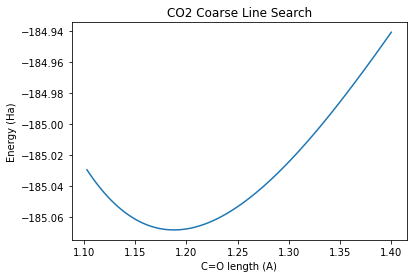

In [2]:
coarseco2 = pd.read_csv("co2line_coarse.csv")
plt.plot(coarseco2['length'], coarseco2['energy'])
plt.title("CO2 Coarse Line Search")
plt.xlabel("C=O length (A)")
plt.ylabel("Energy (Ha)")
plt.show()

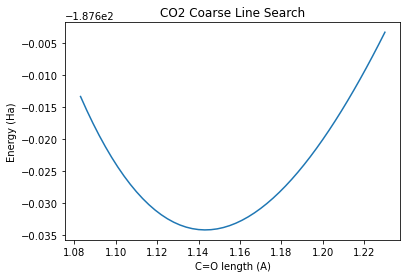

In [7]:
coarseco2 = pd.read_csv("co2line_coarse6-31gs.csv")
plt.plot(coarseco2['length'], coarseco2['energy'])
plt.title("CO2 Coarse Line Search")
plt.xlabel("C=O length (A)")
plt.ylabel("Energy (Ha)")
plt.show()

-185.06839076642598


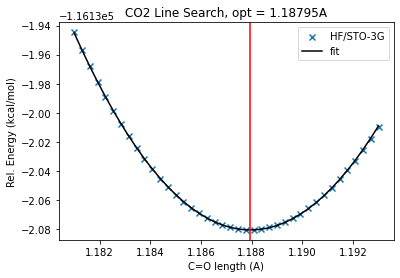

In [18]:
def quad(x, a, b, c):
    return a*x**2 + b*x + c
fineco2 = pd.read_csv("co2line_fine.csv")
plt.scatter(fineco2['length'], fineco2['energy'] * 627.509, marker='x', label='HF/STO-3G')
opt, cov = scipy.optimize.curve_fit(quad, fineco2['length'], fineco2['energy'] * 627.509)
plt.plot(fineco2['length'], quad(fineco2['length'], opt[0], opt[1], opt[2]), color='k', label='fit')

fit_min = -opt[1] / (2*opt[0])
print(quad(fit_min, opt[0], opt[1], opt[2]) / 627.509)
plt.axvline(fit_min, color='red')

plt.legend()
plt.title(f"CO2 Line Search, opt = {fit_min:.5f}A")
plt.xlabel("C=O length (A)")
plt.ylabel("Rel. Energy (kcal/mol)")
# plt.savefig('CO2_line.png', dpi=200)
plt.show()

-187.6341762726045


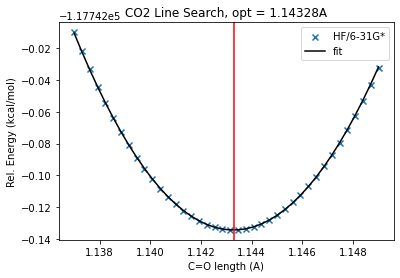

In [19]:
fineco2 = pd.read_csv("co2line_fine6-31gs.csv")
plt.scatter(fineco2['length'], fineco2['energy'] * 627.509, marker='x', label='HF/6-31G*')
opt, cov = scipy.optimize.curve_fit(quad, fineco2['length'], fineco2['energy'] * 627.509)
plt.plot(fineco2['length'], quad(fineco2['length'], opt[0], opt[1], opt[2]), color='k', label='fit')

fit_min = -opt[1] / (2*opt[0])
print(quad(fit_min, opt[0], opt[1], opt[2]) / 627.509)
plt.axvline(fit_min, color='red')

plt.legend()
plt.title(f"CO2 Line Search, opt = {fit_min:.5f}A")
plt.xlabel("C=O length (A)")
plt.ylabel("Rel. Energy (kcal/mol)")
plt.savefig('CO2_line_6-31Gs.png', dpi=200)
plt.show()

## Water optimization

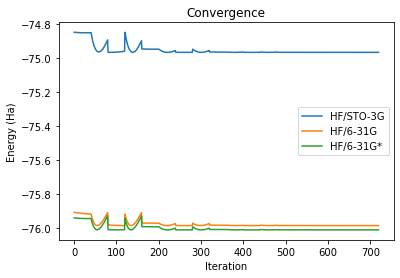

In [30]:
h2oopt = pd.read_csv("h2oline.csv")
h2oopt2 = pd.read_csv("h2o_6-31gs.csv")
h2oopt3 = pd.read_csv("h2o_6-31g.csv")
plt.plot(h2oopt['energy'], label='HF/STO-3G')
plt.plot(h2oopt3['energy'], label='HF/6-31G')
plt.plot(h2oopt2['energy'], label='HF/6-31G*')
plt.xlabel("Iteration")
plt.ylabel("Energy (Ha)")
plt.title("Convergence")
plt.legend()
#plt.savefig("energies.png")
plt.show()

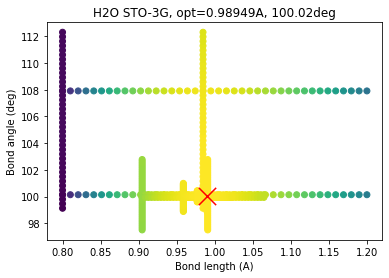

In [34]:
plt.scatter(h2oopt['length'], h2oopt['angle'] * 180 / np.pi, c=np.log(-h2oopt['energy']))
minidx = np.argmin(h2oopt['energy'])
optlen = h2oopt['length'][minidx]
optang = h2oopt['angle'][minidx] * 180 / np.pi
plt.scatter(optlen, optang, color='red', s=300, marker='x')
#plt.colorbar()
plt.title(f"H2O STO-3G, opt={optlen:.5f}A, {optang:.2f}deg")
plt.xlabel("Bond length (A)")
plt.ylabel("Bond angle (deg)")
#plt.savefig("waterSTO-3G.png", dpi=200)
plt.show()

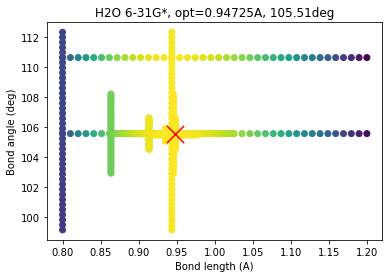

In [39]:
plt.scatter(h2oopt2['length'], h2oopt2['angle'] * 180 / np.pi, c=np.log(-h2oopt2['energy']))
minidx = np.argmin(h2oopt2['energy'])
optlen = h2oopt2['length'][minidx]
optang = h2oopt2['angle'][minidx] * 180 / np.pi
plt.scatter(optlen, optang, color='red', s=300, marker='x')
#plt.colorbar()
plt.title(f"H2O 6-31G*, opt={optlen:.5f}A, {optang:.2f}deg")
plt.xlabel("Bond length (A)")
plt.ylabel("Bond angle (deg)")
#plt.savefig("water6-31Gs.png", dpi=200)
plt.show()

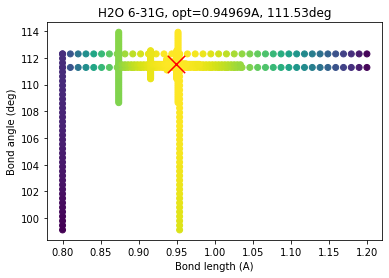

In [36]:
plt.scatter(h2oopt3['length'], h2oopt3['angle'] * 180 / np.pi, c=np.log(-h2oopt3['energy']))
minidx = np.argmin(h2oopt3['energy'])
optlen = h2oopt3['length'][minidx]
optang = h2oopt3['angle'][minidx] * 180 / np.pi
plt.scatter(optlen, optang, color='red', s=300, marker='x')
#plt.colorbar()
plt.title(f"H2O 6-31G, opt={optlen:.5f}A, {optang:.2f}deg")
plt.xlabel("Bond length (A)")
plt.ylabel("Bond angle (deg)")
#plt.savefig("water6-31G.png", dpi=200)
plt.show()